In [ ]:
### 라이브러리 정의
import numpy as np

### 시각화 라이브러리
import matplotlib.pyplot as plt

# - 히트맵 라이브러리
import seaborn as sns

### KNN 회귀모델 라이브러리 정의하기
from sklearn.neighbors import KNeighborsRegressor

# 데이터 분리 라이브러리
from sklearn.model_selection import train_test_split

# - 한글처리
plt.rc("font", family="Malgun Gothic")

# - 마이너스 기호 깨짐 처리
plt.rcParams["axes.unicode_minus"] = False

In [2]:
### 농어의 길이
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )

### 농어의 무게
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

perch_length.shape, perch_weight.shape

((56,), (56,))

##### 농어의 길이를 이용해 무게 예측하기

- 독립변수 : 길이
- 종속변수 : 무게
<br>

- 종속변수의 데이터 형태는 "연속형 데이터" 형태이므로 -> 회귀분석 진행
    - 회귀분석의 예측결과 값은 "추정값" (정확한 값은 아님, 오차 있음)

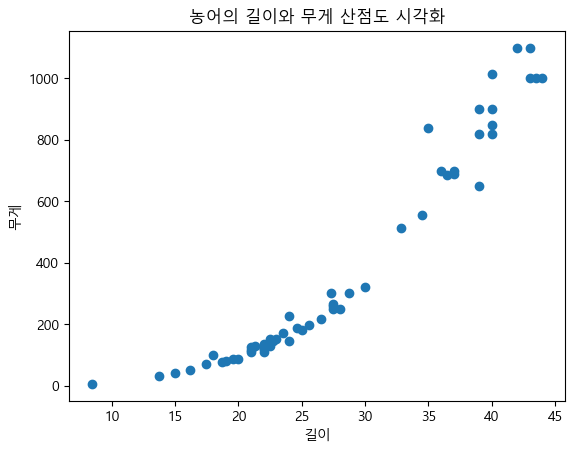

In [3]:
### 농어의 길이와 무게를 산점도 그래프로 시각화 하기
# - 해석도 진행
plt.title("농어의 길이와 무게 산점도 시각화")

plt.scatter(perch_length, perch_weight)

plt.xlabel("길이")
plt.ylabel("무게")
plt.show()

### (해석)
# - x축의 길이가 커질수록, y축의 무게가 커지는 현상을 보이고 있음
# - 우상향의 양의 상관관계 분포를 보이고 있음
# - 따라서, 길이와 무게는 연관성이 있는 것으로 확인됨
# - 산점도의 형태는 선형을 나타내고 있으며, 곡선 형태를 띄고 있음
# - 길이를 이용해서 무게를 예측하는 회귀분석 방법인 선형 방정식을 이용하면 
#   예측하고자하는 무게에 대한 추정이 가능할 것으로 판단됨

### 선형 방정식에는 기울기와 절편이 있음
# - 직선의 방정식(y) = ax + b
# - 곡선의 방정식(y) = ax^2 + bx + c
# 선형 방정식에서 우리가 알고 있는 값은 : x값
# 모델이 알아서 찾아내는 값은 : 기울기, 절편

### 회귀모델은 선형의 형태를 스스로 판단하고,
#    - 스스로 기울기와 절편을 찾아냄
#    --> 스스로 판단하고 찾아내는 것을 --> 훈련(모델 훈련)

#### 데이터 분리하기

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
### 훈련 및 테스트 데이터로 분리
# - 분리 비율 : 75% : 25%
# - 랜덤규칙 : 42
# - 회귀분석에서는 편향을 고려하지 않아도 됨
# - 사용할 변수명 : train_input, train_target, test_input, test_target
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, test_size=0.25, random_state=42
)

print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(42,) (42,)
(14,) (14,)


In [6]:
### 훈련 및 테스트 독립변수의 차원이 1차원으로 되어 있음
# - 머신러닝에서는 독립변수의 차원은 2차원이어야 함
# - 훈련 및 테스트 독립변수의 차원을 2차원으로 만들려면
# print(f"원본 훈련 독립 데이터 : {train_input}")

### 2차원으로 변경하는 넘파이 함수 사용 : reshape(행, 열)
# 첫번째 값 : -1은 전체 행을 의미
# 두번째 값 : 생성할 열을 의미
# reshape(-1, 1) : train_input 데이터의 전체 행에 대한 1개의 열을 생성 (행, 열로 만들어냄)
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [7]:
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [8]:
### 최종 원본
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(42, 1) (42,)
(14, 1) (14,)


#### 회귀모델로 훈련하기

In [9]:
### KNN 회귀모델 라이브러리 정의하기
from sklearn.neighbors import KNeighborsRegressor

In [10]:
### 1. 모델 생성하기
knr = KNeighborsRegressor()

### 2. 모델 훈련시키기
knr.fit(train_input, train_target)

### 3. 훈련 및 테스트 결정계수(r2) 확인하기
train_score = knr.score(train_input, train_target)
test_score = knr.score(test_input, test_target)

print(f"훈련 결정계수 : {train_score}, 테스트 결정계수 : {test_score}")

훈련 결정계수 : 0.9698823289099254, 테스트 결정계수 : 0.992809406101064



- 회귀모델의 결정계수(정확도)
    - 회귀모델에서는 정확도라고 표현하지 않으며, "결정계수"라고 함
    - 결정계수의 다른 표현 : 결정력, 설명력 이라고 함
    - 결정계수 값의 범위 : 0 ~ 1 사이의 값 (1에 가까울 수록 좋음)
    - 결과 문서 작성시 
        - "훈련의 결정계수가 0.97로 설명력이 매우 좋은 모델로 판단됨" 이라고 작성함
- 모델이 좋다 나쁘다의 판단 기준 값으로 사용
- +- 0.03 정도의 오차가 있는 모델이라고 표현


In [11]:
### 4. 테스트 데이터로 예측해 보기
test_pred = knr.predict(test_input)
print(test_pred)
print(test_target)

[  60.    79.6  248.   122.   136.   847.   311.4  183.4  847.   113.
 1010.    60.   248.   248. ]
[   5.9  100.   250.   130.   130.   820.   320.   188.   900.   125.
 1000.    51.5  250.   300. ]


#### 정확도를 이용하여 모델 성능 평가하기 : 과적합여부 판정

- 회귀분석 및 분류분석 모두 공통 적용되는 사항
    - 훈련 이후 훈련 데이터를 이용한 정확도(socre)와 검증(테스트) 데이터를 이용한 정확도(score) 비교
    - 비교한 결과를 기준으로 많은 차이가 나는 경우 -> "과적합이 발생한다" 라고 함
    - 과적합 용어 : 과대적합, 과소적합, 일반화
    - 과적합의 기준 : 정확한 정답은 없음(보통 0.1 차이가 나면 과적합이 발생한 것으로 봄)

##### 과적합 분류
- 과대적합
    - 훈련 정확도 > 검증 (또는 테스트) 정확도인 경우
    - 훈련 정확도가 1이 나온 경우 : 모델 사용 불가
    - 훈련 정확도와 검증(또는 테스트) 정확도가 0.1 이상 차이가 나는 경우
    - 과대적합 처리 방법
        - 1. 데이터 양 늘리기 (데이터 추가 수집 필요) -> 데이터 수집에 어려움이 있음
        - 2. 하이퍼 파라미터 튜닝 -> 일반적으로 선행해서 처리 시작
        - 3. 다른 모델 찾기 -> 1, 2 번으로 처리가 안될 경우 사용
    - 과소적합
        - 훈련 정확도 < 검증 (또는 테스트) 정확도인 경우
        - 훈련 모델 사용 불가
        - 과소적합 처리 방법
            - 1. 데이터 양 늘리기 (데이터 추가 수집 필요) -> 데이터 수집에 어려움이 있음
            - 2. 하이퍼 파라미터 튜닝 -> 일반적으로 선행해서 처리 시작
            - 3. 다른 모델 찾기 -> 1, 2 번으로 처리가 안될 경우 사용
    - 일반화
        - 훈련 정확도와 검증 (또는 테스트) 정확도 차이가 0.01 ~ 0.09 이내인 경우
<br><br>

- 문서에 표현하는 용어
    - 일반화가 되었다는 가정하에 주로 사용
    - 훈련 정확도(score) 0.95 이상 : 매우 훌륭한 모델
    - 훈련 정확도(score) 0.90 이상 : 훌륭한 모델
    - 훈련 정확도(score) 0.85 이상 : 좋은 모델
    - 훈련 정확도(score) 0.85 미만 : 좋다라는 표현은 사용하지 않음

- 가장 이상적인 정확도(score) 비교
    - 훈련 정확도 > 검증 정확도 > 테스트 정확도 : 가장 이상적
    - 훈련정확도 > 검증 정확도 < 테스트 정확도 : 이렇게 나오는 경우도 인정

- 가장 이상적인 정확도를 만들기 위한 작업들
    - 전처리 : 편향 처리, 적절한 데이터 분리, 스케일링
    - 하이퍼 파라미터 튜닝 : 모델마다 가지고 있는 성능에 영향을 미치는 파라미터 값 수정
    - 데이터 수집 : 양적 수집

In [12]:
print(f"훈련 결정계수 : {train_score}, 테스트 결정계수 : {test_score}")

훈련 결정계수 : 0.9698823289099254, 테스트 결정계수 : 0.992809406101064


In [13]:
### 훈련 score가 테스트 score보다 작게 나왔기 때문에 과소적합 발생
# - 현재 상태로는 농어의 길이를 이용하여 무게를 예측하기 위한 KNN 회귀모델은 사용할 수 없음

- 과소적합 처리 방법
    - 1. 데이터 양 늘리기 (데이터 추가 수집 필요)
        - 데이터 수집에 어려움이 있음, 거의 못함
    - 2. 하이퍼 파라미터 튜닝 -> 현재  상태에서 선행 가능
        - 일반적으로 선행해서 처리 시작 -> 향후 진행
    - 3. 다른 모델 찾기 -> 1, 2 번으로 처리가 안될 경우 사용

#### 하이퍼 파라미터 튜닝

- 모델마다 튜닝할 파라미터는 각기 다름
- KNN 에서 기본적으로 튜닝할 파라미터 : 이웃의 갯수
- 튜닝방법
    1. 훈련모델 생성
     2. 최초 훈련 시키기
     3. 하이퍼 파라미터 값 변경 > 훈련 시키기
     4. 정확도 확인
     5. 3번 ~ 4번 반복

In [14]:
### 기존 훈련시킨 모델을 그대로 사용하여 하이퍼 파라미터 값 변경 후 재훈련
# - 하이퍼 파라미터 이웃의 갯수 5로 정의
knr.n_neighbors = 5

# - 훈련 시키기
knr.fit(train_input, train_target)

# - 훈련 정확도 및 테스트 정확도 확인
train_score = knr.score(train_input, train_target)
test_score = knr.score(test_input, test_target)

# 훈련 및 테스트 차이 확인
print(f"훈련 결정계수 : {train_score}, 테스트 결정계수 : {test_score}, 훈련 - 테스트 : {train_score - test_score}")

# - 최초(이웃 5개) : 훈련 결정계수 : 0.9698823289099254, 테스트 결정계수 : 0.992809406101064
# 결과 : 훈련 결정계수 : 0.9698823289099254, 테스트 결정계수 : 0.992809406101064, 훈련 - 테스트 : -0.022927077191138623

훈련 결정계수 : 0.9698823289099254, 테스트 결정계수 : 0.992809406101064, 훈련 - 테스트 : -0.022927077191138623


In [15]:
### 하이퍼 파라미터 이웃의 갯수 3으로 확인
knr.n_neighbors = 3

# - 훈련 시키기
knr.fit(train_input, train_target)

# - 훈련 정확도 및 테스트 정확도 확인
train_score = knr.score(train_input, train_target)
test_score = knr.score(test_input, test_target)

# 훈련 및 테스트 차이 확인
print(f"훈련 결정계수 : {train_score}, 테스트 결정계수 : {test_score}, 훈련 - 테스트 : {train_score - test_score}")

# - 최초(이웃 5개) : 훈련 결정계수 : 0.9698823289099254, 테스트 결정계수 : 0.992809406101064
# 결과(이웃 3개) : 훈련 결정계수 : 0.9804899950518966, 테스트 결정계수 : 0.9746459963987609, 훈련 - 테스트 : 0.005843998653135674

훈련 결정계수 : 0.9804899950518966, 테스트 결정계수 : 0.9746459963987609, 훈련 - 테스트 : 0.005843998653135674


In [16]:
### 이웃의 갯수가 3일때 보다 더 좋은 성능을나타낼 수 있는 이웃의 갯수 찾기

for idx in range(3, len(train_input), 2) :
    knr.n_neighbors = idx
    knr.fit(train_input, train_target)
    train_score = knr.score(train_input, train_target)
    test_score = knr.score(test_input, test_target)

    # 훈련 및 테스트 차이 확인
    print(f"훈련 결정계수 : {train_score}, 테스트 결정계수 : {test_score}, 훈련 - 테스트 : {train_score - test_score}")

# - 최초(이웃 5개) : 훈련 결정계수 : 0.9698823289099254, 테스트 결정계수 : 0.992809406101064

훈련 결정계수 : 0.9804899950518966, 테스트 결정계수 : 0.9746459963987609, 훈련 - 테스트 : 0.005843998653135674
훈련 결정계수 : 0.9698823289099254, 테스트 결정계수 : 0.992809406101064, 훈련 - 테스트 : -0.022927077191138623
훈련 결정계수 : 0.9761170732051527, 테스트 결정계수 : 0.9781383949643516, 훈련 - 테스트 : -0.002021321759198891
훈련 결정계수 : 0.9693310367551284, 테스트 결정계수 : 0.9692647749722698, 훈련 - 테스트 : 6.626178285862316e-05
훈련 결정계수 : 0.9515761381539326, 테스트 결정계수 : 0.970279643030474, 훈련 - 테스트 : -0.018703504876541377
훈련 결정계수 : 0.9413423450130075, 테스트 결정계수 : 0.9639044643206888, 훈련 - 테스트 : -0.02256211930768126
훈련 결정계수 : 0.930201118360776, 테스트 결정계수 : 0.9554827691127018, 훈련 - 테스트 : -0.025281650751925788
훈련 결정계수 : 0.9087778943199959, 테스트 결정계수 : 0.9314058693169347, 훈련 - 테스트 : -0.022627974996938804
훈련 결정계수 : 0.8782082893573573, 테스트 결정계수 : 0.900993697623706, 훈련 - 테스트 : -0.022785408266348672
훈련 결정계수 : 0.8410922229110086, 테스트 결정계수 : 0.8596922255009882, 훈련 - 테스트 : -0.018600002589979625
훈련 결정계수 : 0.7915879473391005, 테스트 결정계수 : 0.8146418957364303, 훈련 - 

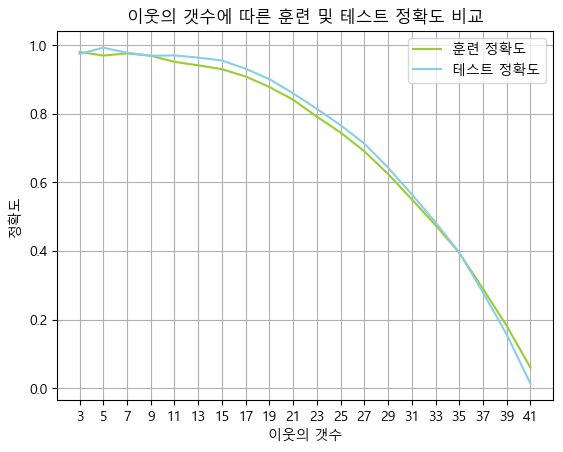

In [17]:
### 이웃의 갯수 3 ~ 훈련 데이터의 갯수만큼 훈련 시킨 결과
# - 훈련 정확도와 테스트 정확도를 선그래프 시각적으로 확인
# - x축 : 이웃의 갯수, y축 : 훈련 및 테스트 정확도
# - 훈련 정확도 선과 테스트 정확도 선을 하나의 그래프에 그려서 비교

# x, y 값을 저장할 리스트 초기화
train_scores = []
test_scores = []
neighbors = []
x_index = np.arange(3, len(train_input)+1, 2)

plt.title("이웃의 갯수에 따른 훈련 및 테스트 정확도 비교")

# k 값에 따라 정확도를 계산
for idx in range(3, len(train_input), 2):
    knr.n_neighbors = idx
    knr.fit(train_input, train_target)
    train_score = knr.score(train_input, train_target)
    test_score = knr.score(test_input, test_target)

    # 정확도 값을 리스트에 추가
    # plot()은 리스트를 가지고 그래프를 그리기 때문
    neighbors.append(idx)
    train_scores.append(train_score)
    test_scores.append(test_score)

# 훈련 정확도와 테스트 정확도 선 그래프 그리기
plt.plot(neighbors, train_scores, label='훈련 정확도', color='yellowgreen')
plt.plot(neighbors, test_scores, label='테스트 정확도', color='skyblue')

# x축 값 상세히 표시
plt.xticks(x_index)

# 그래프의 격자 추가
plt.grid()

# x축, y축 이름 설정
plt.xlabel("이웃의 갯수")
plt.ylabel("정확도")

# 범례 추가
plt.legend()

# 그래프 보여주기
plt.show()

In [18]:
### 최적의 이웃의 갯수 3으로 모델 신규 생성 및 훈련
knr.n_neighbors = 3

# - 훈련 시키기
knr.fit(train_input, train_target)

# - 훈련 정확도 및 테스트 정확도 확인
train_score = knr.score(train_input, train_target)
test_score = knr.score(test_input, test_target)

# 훈련 및 테스트 차이 확인
print(f"훈련 결정계수 : {train_score}, 테스트 결정계수 : {test_score}, 훈련 - 테스트 : {train_score - test_score}")

훈련 결정계수 : 0.9804899950518966, 테스트 결정계수 : 0.9746459963987609, 훈련 - 테스트 : 0.005843998653135674


#### 최종 평가하기

- 회귀분석 평가
    - 평가를 위해서는 예측(predict)이 선행 되어야 함
    - 예측된 결과를 기준으로 평가를 수행

- 회귀분석 평가 방법
    - 평균절대오차(MAE, Mean Absolute Error)
    - 평균제곱오차(MSE, Mean Squere Error)
    - 결정계수(R2-score) == score()와 동일

- 평과 결과 해석
    - 평균절대오차(MAE)의 결과를 이용해서 오차의 범위 확인 가능
    - 결정계수(R2) 값을 이용하여 모델 선정여부 판정
        - 여러 모델들간에 비교하여 최종 선정 시에 R2-score의 값을 기준으로 선정여부 판정
        - 여러 모델 선정 기준 : R2-score 값이 높고 훈련 정확도가 높은 모델 선정

In [19]:
### 테스트 데이터로 예측하기
# - 결과값은 예측된 종속변수의 값
test_pred = knr.predict(test_input)
test_pred

array([  47.33333333,   76.        ,  247.66666667,  120.        ,
        143.33333333,  921.66666667,  275.        ,  183.33333333,
        773.33333333,  120.        , 1033.33333333,   62.66666667,
        275.        ,  247.66666667])

#### 평균절대오차(MAE) 평가하기

In [20]:
# - MAE 라이브러리 정의
from sklearn.metrics import mean_absolute_error

In [21]:
### MEA 평가
# - mean_absolute_error(실제 종속변수, 예측 종속변수)
mea = mean_absolute_error(test_target, test_pred)

mea

### 해석
# - 해당 훈련 모델을 이용하여 농어의 무게를 예측할 경우
# - 약 (+-)35.42g 정도의 오차가 발생할 수 있는 모델임

35.42380952380951

#### 임의 값으로 예측하기

In [26]:
### 임의 값 길이 50cm로 무게 예측해 보기
# 예측 결과값을 pred 변수에 담기
pred = knr.predict([[50]])

pred

array([1033.33333333])

In [27]:
### 임의 값 길이 50cm에 사용된 이웃 데이터의 인덱스 번호 추출
# 인덱스 번호 변수명 : indexes
distances, indexes = knr.kneighbors([[50]])
indexes

array([[34,  8, 14]], dtype=int64)

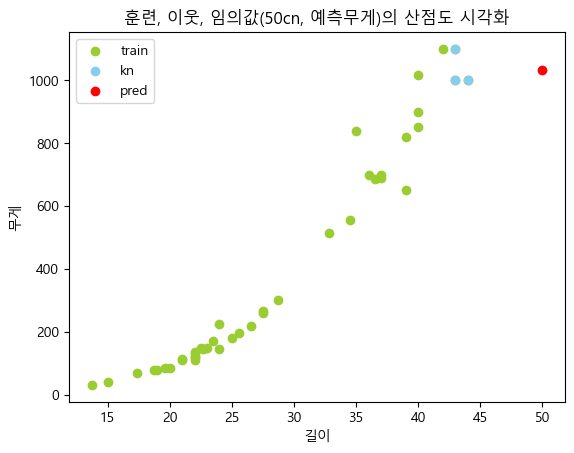

In [30]:
### 훈련 데이터(연두색), 이웃(하늘색), 임의값(빨강색)을 산점도로 그리기
plt.title("훈련, 이웃, 임의값(50cn, 예측무게)의 산점도 시각화")

# 훈련 데이터
plt.scatter(train_input, train_target, c="yellowgreen", label="train")

# 이웃 데이터
plt.scatter(train_input[indexes], train_target[indexes], c="skyblue", label="kn")

# 임의 데이터
plt.scatter(50, pred[0], c="red", label="pred")

plt.xlabel("길이")
plt.ylabel("무게")

# 범례 추가
plt.legend()

# 그래프 보여주기
plt.show()


예측 결과 : [1033.33333333]


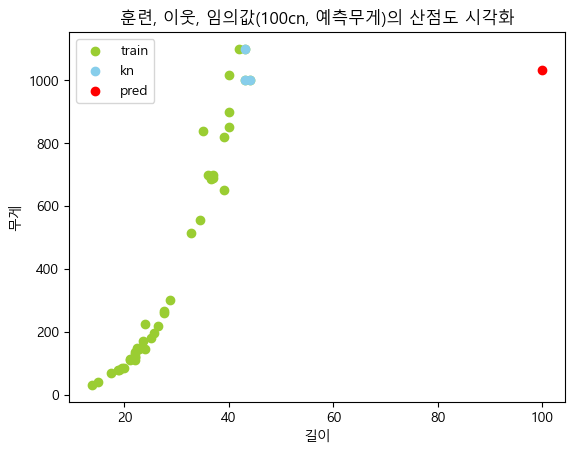

In [32]:
### 임의 값 길이 100cm로 무게 예측해 보기
pred = knr.predict([[100]])
print(f"예측 결과 : {pred}")

### 임의 값 길이 100cm에 사용된 이웃 데이터의 인덱스 번호 추출
distances, indexes = knr.kneighbors([[100]])

### 훈련 데이터(연두색), 이웃(하늘색), 임의값(빨강색)을 산점도로 그리기
plt.title("훈련, 이웃, 임의값(100cn, 예측무게)의 산점도 시각화")

# 훈련 데이터
plt.scatter(train_input, train_target, c="yellowgreen", label="train")

# 이웃 데이터
plt.scatter(train_input[indexes], train_target[indexes], c="skyblue", label="kn")

# 임의 데이터
plt.scatter(100, pred[0], c="red", label="pred")

plt.xlabel("길이")
plt.ylabel("무게")

# 범례 추가
plt.legend()

plt.show()

예측 결과 : [1033.33333333]


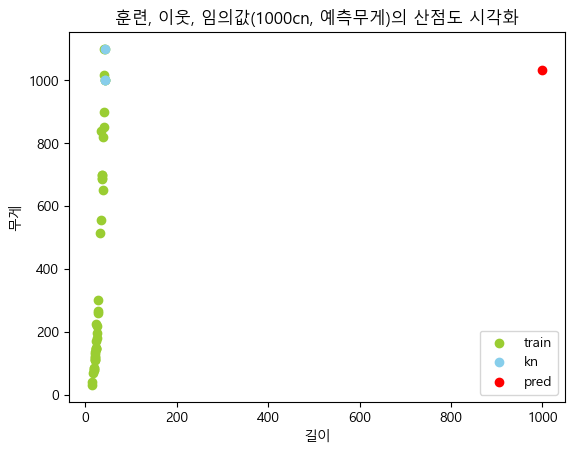

In [33]:
### 임의 값 길이 1000cm로 무게 예측해 보기
pred = knr.predict([[1000]])
print(f"예측 결과 : {pred}")

### 임의 값 길이 100cm에 사용된 이웃 데이터의 인덱스 번호 추출
distances, indexes = knr.kneighbors([[1000]])

### 훈련 데이터(연두색), 이웃(하늘색), 임의값(빨강색)을 산점도로 그리기
plt.title("훈련, 이웃, 임의값(1000cn, 예측무게)의 산점도 시각화")

# 훈련 데이터
plt.scatter(train_input, train_target, c="yellowgreen", label="train")

# 이웃 데이터
plt.scatter(train_input[indexes], train_target[indexes], c="skyblue", label="kn")

# 임의 데이터
plt.scatter(1000, pred[0], c="red", label="pred")

plt.xlabel("길이")
plt.ylabel("무게")

# 범례 추가
plt.legend()

plt.show()

##### 해석
- 길이를 50cm, 100cm, 1000cm를 사용 하였을 때 무게의 예측값이 모두 같게 나타나는 문제 발생
- 원인
    - 훈련 데이터의 길이의 최소 ~ 최대 범위를 벗어난 임의의 길이 값으로 예측 할 경우
    - 항상 가장 가까운 이웃들만 선택되는 현상이 발생
    - 즉, 거리가 멀더라도 가장 가까운 것으로 인지하게 됨
- 결론
    - KNN 모델이 훈련 시 사용한 훈련 데이터의 값의 범위를 벗어난 임의 값들은 예측이 불가능함
    - 예측은 가능하지만 정확도를 인증받을 수 없음
    - KNN의 한계로 이를 해결할 수 있는 방법은 없음
    - KNN 모델을 사용하려면 예측 전제조건으로 훈련 데이터의 값의 min ~ max의 범위로 한정해야 함
    - 이를 극복한 다른 모델을 사용해야 함(KNN 이후 만들어진 모델들은 한계 없이 사용됨)